# Modeling Notebook

## Initial Setup

In [6]:
# Warning: this notebook takes significant time to run given all the model training

import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils import class_weight
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import keras
import tensorflow as tf
from keras.utils.multi_gpu_utils import multi_gpu_model
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding, Dropout, Activation, Bidirectional, GlobalMaxPool1D  
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.preprocessing import text, sequence
from keras.wrappers.scikit_learn import KerasClassifier
import pickle
import matplotlib.pyplot as plt

# Importing Custom functions from code folder
import sys  
sys.path.insert(0, './code/')
import contraction
import data_preparation as dp
import visualizations as viz

params = {'axes.titlesize': 20,
          'axes.labelsize' : 16,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'font.size': 14,
          'figure.figsize': (12, 8)}
plt.rcParams.update(params)

### Loading Data

In [2]:
with open('./data/clean_data.pickle', 'rb') as file:
    data = pickle.load(file)

In [3]:
data.head()

,label,cleaned_text,cleaned_title,no_stop_text
0,fake,sponsored links republican attacks on transgen...,virginia republican wants schools to check chi...,sponsored links republican attacks transgender...
1,fake,mental images my pictures ask where does the t...,mental images,mental images pictures ask truth end lies begi...
2,fake,but it appears not all mr zuckerbergs own empl...,denzel washington hit by facebook fake news st...,appears mr zuckerbergs employees satisfied res...
3,fake,genius nickname email password by clicking cre...,song lyrics knowledge,genius nickname email password clicking create...
4,fake,getting ballot access can be hard for smaller ...,thinking about writing in a candidate on elect...,getting ballot access hard smaller campaigns f...


### Encoding and Spliting

In [4]:
label = LabelEncoder()
X = data['cleaned_text']
y = label.fit_transform(data['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## TF-IDF Models

Our first models will used TF-IDF to embedded the full text.

In [5]:
tfidf = TfidfVectorizer(max_features=1000)
X_train_vectorized = tfidf.fit_transform(X_train)
X_test_vectorized = tfidf.transform(X_test)

### Naive Bayesian

In [6]:
bayes_model = MultinomialNB()
bayes_cv = cross_val_score(bayes_model, X_train_vectorized, y_train)
bayes_cv

array([0.80418987, 0.8127772 , 0.80134013, 0.80728577, 0.80502076])

In [7]:
bayes_model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [8]:
print('Training Scores:')
dp.get_scores(bayes_model, X_train_vectorized, y_train)

Training Scores:


{'Accuracy': 0.8073496659242761,
 'Precision': 0.806966786782127,
 'Recall': 0.8073496659242761,
 'F1 Score': 0.8070704521379753}

In [9]:
print('Test Scores:')
dp.get_scores(bayes_model, X_test_vectorized, y_test)

Test Scores:


{'Accuracy': 0.8062056469877699,
 'Precision': 0.805768543681682,
 'Recall': 0.8062056469877699,
 'F1 Score': 0.8057512159741653}

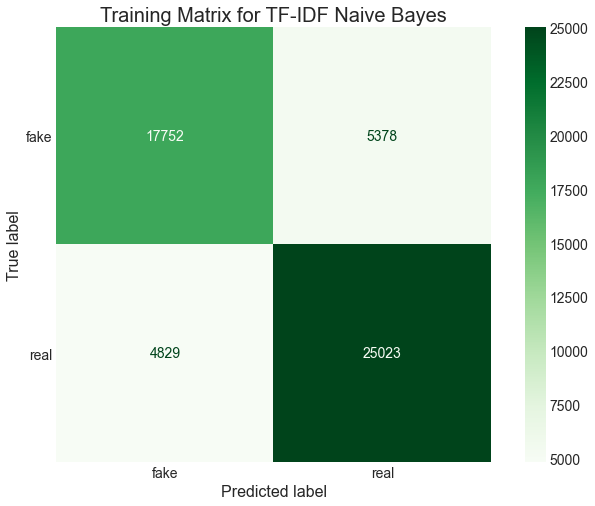

In [10]:
ConfusionMatrixDisplay.from_estimator(bayes_model, X_train_vectorized, y_train, display_labels=label.classes_, cmap="Greens")
plt.grid(False)
plt.title('Training Matrix for TF-IDF Naive Bayes')
plt.savefig(f'images/Models/train_TFIDF_bayes.png')
plt.show()

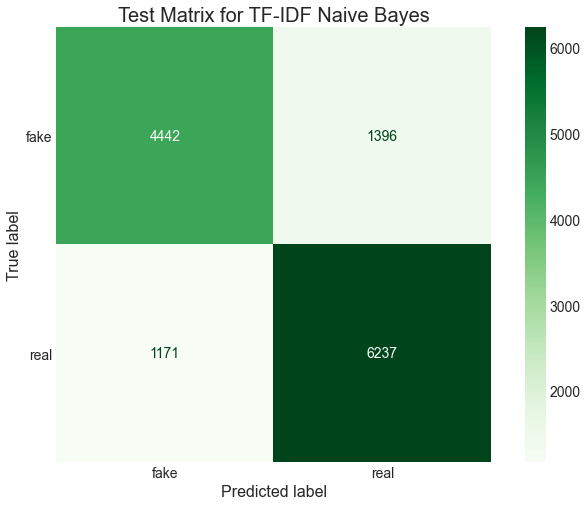

In [11]:
ConfusionMatrixDisplay.from_estimator(bayes_model, X_test_vectorized, y_test, display_labels=label.classes_, cmap="Greens")
plt.grid(False)
plt.title('Test Matrix for TF-IDF Naive Bayes')
plt.savefig(f'images/Models/test_TFIDF_bayes.png')
plt.show()

### Logistic

In [12]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_cv = cross_val_score(logistic_model, X_train_vectorized, y_train)
logistic_cv

array([0.87996603, 0.89110126, 0.88976972, 0.88372971, 0.88212533])

In [13]:
logistic_model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

In [14]:
print('Training Scores:')
dp.get_scores(logistic_model, X_train_vectorized, y_train)

Training Scores:


{'Accuracy': 0.8927937790192896,
 'Precision': 0.892730860893658,
 'Recall': 0.8927937790192896,
 'F1 Score': 0.8925670241032152}

In [15]:
print('Test Scores:')
dp.get_scores(logistic_model, X_test_vectorized, y_test)

Test Scores:


{'Accuracy': 0.8896270572248226,
 'Precision': 0.88972164112265,
 'Recall': 0.8896270572248226,
 'F1 Score': 0.8893192294695682}

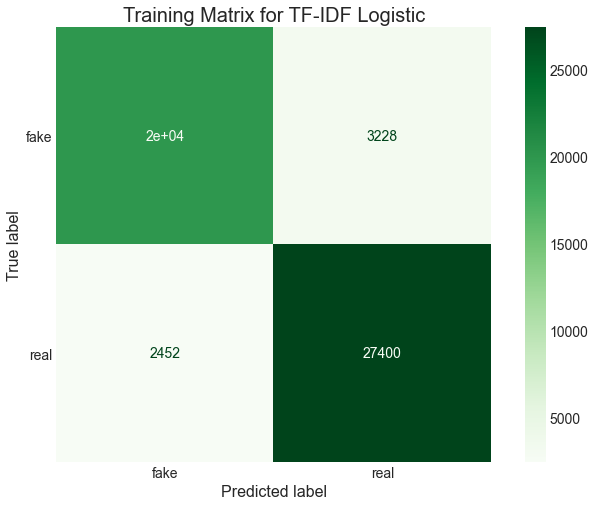

In [16]:
ConfusionMatrixDisplay.from_estimator(logistic_model, X_train_vectorized, y_train, display_labels=label.classes_, cmap="Greens")
plt.grid(False)
plt.title('Training Matrix for TF-IDF Logistic')
plt.savefig(f'images/Models/train_TFIDF_logistic.png')
plt.show()

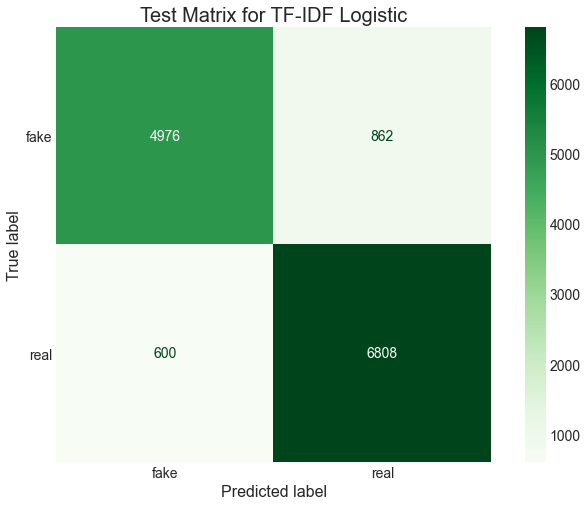

In [17]:
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test_vectorized, y_test, display_labels=label.classes_, cmap="Greens")
plt.grid(False)
plt.title('Test Matrix for TF-IDF Logistic')
plt.savefig(f'images/Models/train_TFIDF_logistic.png')
plt.show()

### SVC

In [ ]:
svm_model = SVC()
svm_cv = cross_val_score(svm_model, X_train_vectorized, y_train, njobs=4, verbose=1)
svm_cv

In [ ]:
svm_model.fit(X_train_vectorized, y_train)

In [ ]:
print('Training Scores:')
dp.get_scores(svm_model, X_train_vectorized, y_train)

In [ ]:
print('Test Scores:')
dp.get_scores(svm_model, X_test_vectorized, y_test)

In [ ]:
ConfusionMatrixDisplay.from_estimator(svm_model, X_train_vectorized, y_train, display_labels=label.classes_, cmap="Greens")
plt.grid(False)
plt.title('Training Matrix for TF-IDF SVM')
plt.savefig(f'images/Models/train_TFIDF_svm.png')
plt.show()

In [ ]:
ConfusionMatrixDisplay.from_estimator(svm_model, X_test_vectorized, y_test, display_labels=label.classes_, cmap="Greens")
plt.grid(False)
plt.title('Test Matrix for TF-IDF SVM')
plt.savefig(f'images/Models/test_TFIDF_svm.png')
plt.show()

### Random Forest

In [20]:
forest_model = RandomForestClassifier()
forest_cv = cross_val_score(forest_model, X_train_vectorized, y_train, n_jobs=4, verbose=1)
forest_cv

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:  7.0min finished


array([0.90516184, 0.91714636, 0.90317101, 0.90713477, 0.90449226])

In [21]:
forest_model.fit(X_train_vectorized, y_train)

RandomForestClassifier()

In [22]:
print('Training Scores:')
dp.get_scores(forest_model, X_train_vectorized, y_train)

Training Scores:


{'Accuracy': 0.9964704994148956,
 'Precision': 0.9964792750680905,
 'Recall': 0.9964704994148956,
 'F1 Score': 0.9964694228375306}

In [24]:
print('Test Scores:')
dp.get_scores(forest_model, X_test_vectorized, y_test)

Test Scores:


{'Accuracy': 0.9192208968745281,
 'Precision': 0.9200781479941663,
 'Recall': 0.9192208968745281,
 'F1 Score': 0.9188721877862656}

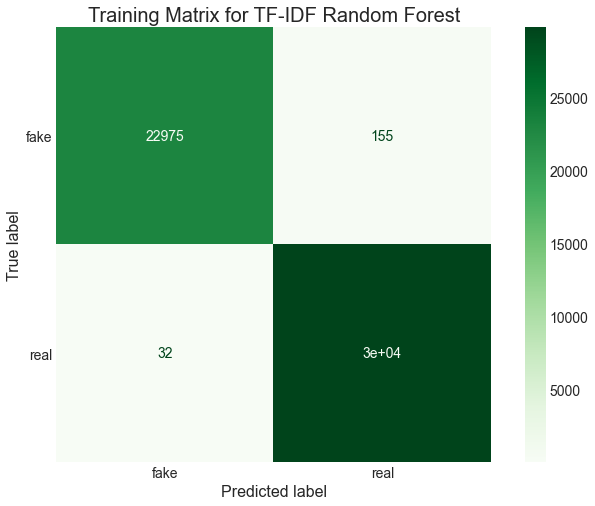

In [25]:
ConfusionMatrixDisplay.from_estimator(forest_model, X_train_vectorized, y_train, display_labels=label.classes_, cmap="Greens")
plt.grid(False)
plt.title('Training Matrix for TF-IDF Random Forest')
plt.savefig(f'images/Models/train_TFIDF_forest.png')
plt.show()

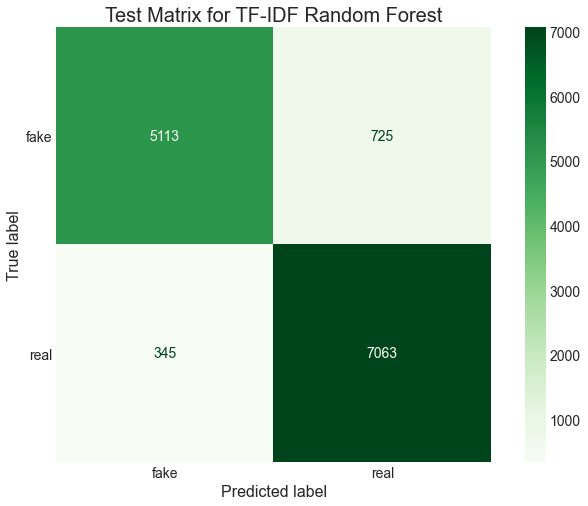

In [26]:
ConfusionMatrixDisplay.from_estimator(forest_model, X_test_vectorized, y_test, display_labels=label.classes_, cmap="Greens")
plt.grid(False)
plt.title('Test Matrix for TF-IDF Random Forest')
plt.savefig(f'images/Models/train_TFIDF_forest.png')
plt.show()

### XGBoost

In [34]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=4)
xgb_cv = cross_val_score(xgb_model, X_train_vectorized, y_train)
xgb_cv

array([0.9066717 , 0.91752383, 0.90619102, 0.9104379 , 0.90420914])

In [35]:
xgb_model.fit(X_train_vectorized, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [36]:
print('Training Scores:')
dp.get_scores(xgb_model, X_train_vectorized, y_train)

Training Scores:


{'Accuracy': 0.9597410441281945,
 'Precision': 0.9599398250735441,
 'Recall': 0.9597410441281945,
 'F1 Score': 0.9596637275519716}

In [38]:
print('Test Scores:')
dp.get_scores(xgb_model, X_test_vectorized, y_test)

Test Scores:


{'Accuracy': 0.9146157330514872,
 'Precision': 0.9146243407429487,
 'Recall': 0.9146157330514872,
 'F1 Score': 0.9144720988798027}

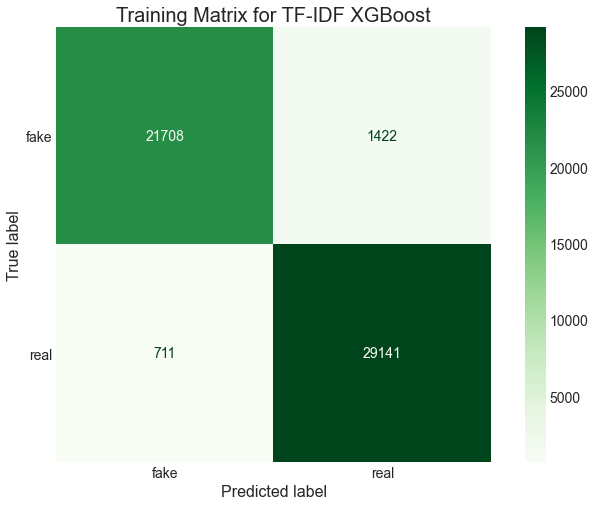

In [39]:
ConfusionMatrixDisplay.from_estimator(xgb_model, X_train_vectorized, y_train, display_labels=label.classes_, cmap="Greens")
plt.grid(False)
plt.title('Training Matrix for TF-IDF XGBoost')
plt.savefig(f'images/Models/train_TFIDF_xgb.png')
plt.show()

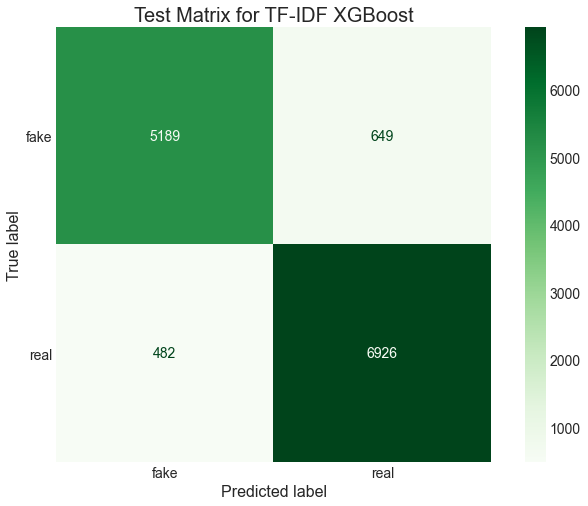

In [40]:
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test_vectorized, y_test, display_labels=label.classes_, cmap="Greens")
plt.grid(False)
plt.title('Test Matrix for TF-IDF XGBoost')
plt.savefig(f'images/Models/train_TFIDF_xgb.png')
plt.show()

### RNN

In [41]:
y_one_hot = pd.get_dummies(data['label']).values
X_rnn = data['cleaned_text']
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_rnn, y_one_hot, test_size=0.2, random_state=42)

In [50]:
tokenizer = text.Tokenizer(num_words=10000)
tokenizer.fit_on_texts(list(X_train))
train_list_tokenized = tokenizer.texts_to_sequences(X_train_rnn)
X_train_padded = sequence.pad_sequences(train_list_tokenized, maxlen=500)
test_list_tokenized = tokenizer.texts_to_sequences(X_test_rnn)
X_test_padded = sequence.pad_sequences(test_list_tokenized, maxlen=500)

In [57]:
with tf.device('/cpu:0'):
    baseline_rnn = Sequential()
    embedding_size = 200
    baseline_rnn.add(Embedding(10000, embedding_size))
    baseline_rnn.add(LSTM(100, return_sequences=True))
    baseline_rnn.add(GlobalMaxPool1D())
    baseline_rnn.add(Dropout(0.5))
    baseline_rnn.add(Dense(100, activation='relu'))
    baseline_rnn.add(Dropout(0.5))
    baseline_rnn.add(Dense(2, activation='softmax'))

In [59]:
parallel_baseline_rnn = multi_gpu_model(baseline_rnn, gpus=2)
parallel_baseline_rnn.compile(loss='categorical_crossentropy', 
                              optimizer='adam', 
                              metrics=['accuracy'])

ValueError: To call `multi_gpu_model` with `gpus=2`, we expect the following devices to be available: ['/cpu:0', '/gpu:0', '/gpu:1']. However this machine only has: ['/cpu:0']. Try reducing `gpus`.

In [7]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [8]:
tf.test.gpu_device_name()

''

In [11]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 856776976764501508
xla_global_id: -1
]


In [10]:
print(tf.test.is_built_with_cuda())

True


In [52]:
callback = callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
baseline_rnn_val = baseline_rnn.fit(X_train_padded,
                                    y_train_rnn, 
                                    epochs=20, 
                                    batch_size=64, 
                                    validation_split=0.2,
                                    callbacks=[callback])

Epoch 1/20
663/663 [==============================] - 614s 924ms/step - loss: 0.3081 - accuracy: 0.8644 - val_loss: 0.2468 - val_accuracy: 0.9025
Epoch 2/20
663/663 [==============================] - 626s 945ms/step - loss: 0.1862 - accuracy: 0.9286 - val_loss: 0.2120 - val_accuracy: 0.9154
Epoch 3/20
663/663 [==============================] - 647s 976ms/step - loss: 0.1401 - accuracy: 0.9456 - val_loss: 0.2266 - val_accuracy: 0.9104
Epoch 4/20
 27/663 [>.............................] - ETA: 9:55 - loss: 0.1148 - accuracy: 0.9554

KeyboardInterrupt: 

### GloVe

In [ ]:
word_index = tokenizer.word_index
print('There are {} unique tokens in the dataset.'.format(len(word_index)))

In [ ]:
glove = {}
with open('glove.42B.300d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in word_index.keys():
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector

In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, 300)) # 100 dimensions since we used 100 dimensional glove vectors
for word, i in word_index.items():
    embedding_vector = glove.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_layer = Embedding(len(word_index) + 1,
                            300,
                            weights=[embedding_matrix],
                            input_length=500,
                            trainable=False)

In [ ]:
glove_rnn = Sequential()
glove_rnn.add(embedding_layer)
glove_rnn.add(LSTM(100, return_sequences=True))
glove_rnn.add(GlobalMaxPool1D())
glove_rnn.add(Dropout(0.5))
glove_rnn.add(Dense(100, activation='relu'))
glove_rnn.add(Dropout(0.5))
glove_rnn.add(Dense(2, activation='softmax'))
glove_rnn.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
glove_rnn.summary()

In [ ]:
glove_rnn_val = glove_rnn.fit(X_train_padded,
                              y_train_rnn,
                              epochs=20,
                              batch_size=64,
                              validation_split=0.2,
                              callbacks=[callback])   